In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# data cleaning
def dataClean(df):
  # there's an extra column at the end of the data set that needs removing.
  df = df.drop(columns=["id", "Unnamed: 32"])
  # other than this, there is no more data cleaning to do.
  return df

In [122]:
# First we isolate the classification column of the datasset ('diagnosis').
# Because 'diagnosis' uses M & B as labels and CFS uses numbers, we map
# M and B to 1 and 0, respectively.
def predClassMapping(df):
  df['diagnosis'] = pd.Series(df.diagnosis).map({'M':1,'B':0});
  return df

In [123]:
#12/24
# CORRELATION FEATURE SELECTION
R_XY = None
# tauRed = 0.8, k = 6
def corrFeatureSelection(df, k = 10, tauRedundancy = 0.8):
  # 1) Sort features by absolute correlation with the label (descending)
  targetCorr = df.corr()['diagnosis'].abs().sort_values(ascending=False)
  R_XY = targetCorr
  # 2) Now pick features one by one from the most strongly correlated
  #    to the least, but skip any feature that is "too correlated"

  selectedFeatures = []
  rejectedFeatures = []

  for feature in targetCorr.index:
    if feature == 'diagnosis':
      continue  # Skip the label itself

    # Check correlation with already selected features
    aboveThreshold = False
    for alreadySelected in selectedFeatures:
      # If the correlation is above the threshold, skip
      if abs(df[feature].corr(df[alreadySelected])) > tauRedundancy:
        aboveThreshold = True
        rejectedFeatures.append(feature)
        break

    if not aboveThreshold:
      selectedFeatures.append(feature)

    # If we already have our 10 features, stop
    if len(selectedFeatures) == k:
      break

  print("Selected features:", selectedFeatures)
  print("Num features:", len(selectedFeatures))
  # This will give up to 10 features that are:
  # - highly correlated with the label (because we started with that sorted list),
  # - but have low correlation with each other (due to our threshold check).

  selectedDF = df[['diagnosis'] + selectedFeatures]

  return { "sfCorrMatrix": selectedDF.corr(), "selectedDF": selectedDF,"selectedFeatures": selectedFeatures, "rejectedFeatures": rejectedFeatures }

Selected features: ['concave points_worst', 'radius_worst', 'radius_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst']
Num features: 6


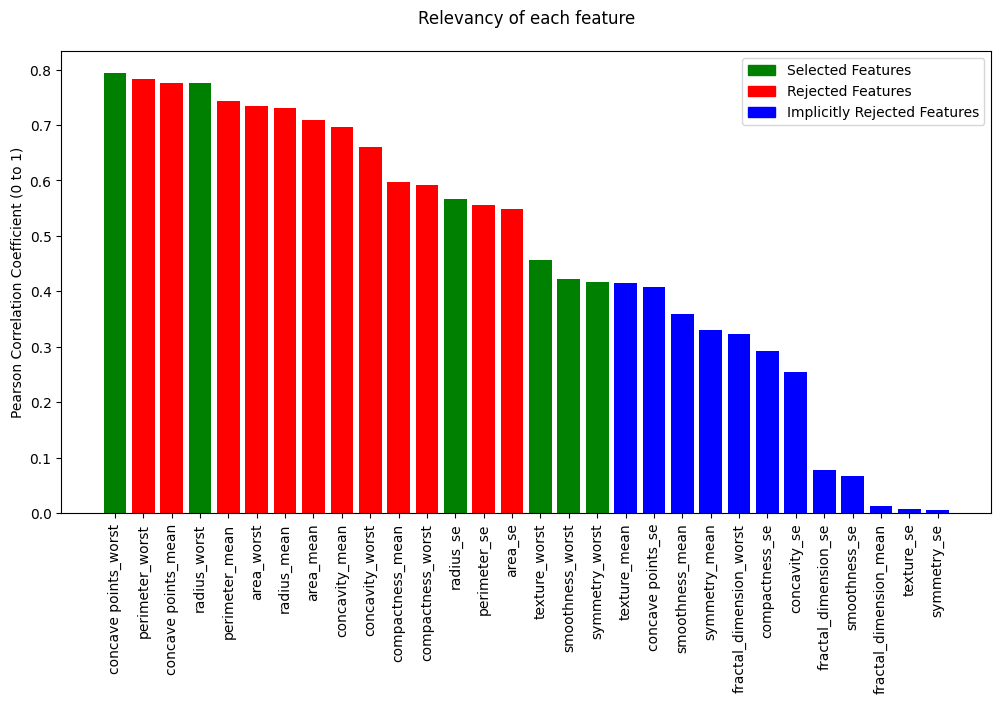

In [124]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load and process data
df = pd.read_csv("data.csv")
df = dataClean(df)
df = predClassMapping(df)

# Compute correlations and perform CFS
R_XY = df.corr()['diagnosis'].abs().sort_values(ascending=False)
# Remove the 'diagnosis' entry from the correlation Series
R_XY = R_XY.drop('diagnosis')

res = corrFeatureSelection(df, k=6, tauRedundancy=0.8)

# Extract features and their correlation values (without 'diagnosis')
features = R_XY.index
correlations = R_XY.values

# Create a color list for each feature based on its status:
colors = []
for feature in features:
    if feature in res["selectedFeatures"]:
        colors.append("green")
    elif feature in res["rejectedFeatures"]:
        colors.append("red")
    else:
        # Implicitly rejected (not processed) features
        colors.append("blue")

# Plot the bar chart with the custom colors
plt.figure(figsize=(12, 6))
plt.bar(features, correlations, color=colors)
plt.title('Relevancy of each feature', pad=20)
plt.ylabel('Pearson Correlation Coefficient (0 to 1)')
plt.xticks(rotation=90)

# Create a custom legend to clarify the colors
selected_patch = mpatches.Patch(color="green", label="Selected Features")
rejected_patch = mpatches.Patch(color="red", label="Rejected Features")
implicit_patch = mpatches.Patch(color="blue", label="Implicitly Rejected Features")
plt.legend(handles=[selected_patch, rejected_patch, implicit_patch])

plt.show()

In [125]:
# 10/24
# SPLIT DATA SET
import sklearn as skl
from sklearn.model_selection import train_test_split


def splitData(df, testSize = 0.20):
  # Split the label column from the features
  Y = df.loc[:, 'diagnosis']
  X = df.loc[:, df.columns != 'diagnosis']

  # Now split the X and Y datasets into train/test (0.8/0.2 split by default)
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=testSize, random_state=23)
  return [Xtrain, Xtest, Ytrain, Ytest]

Numeric columns to plot: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


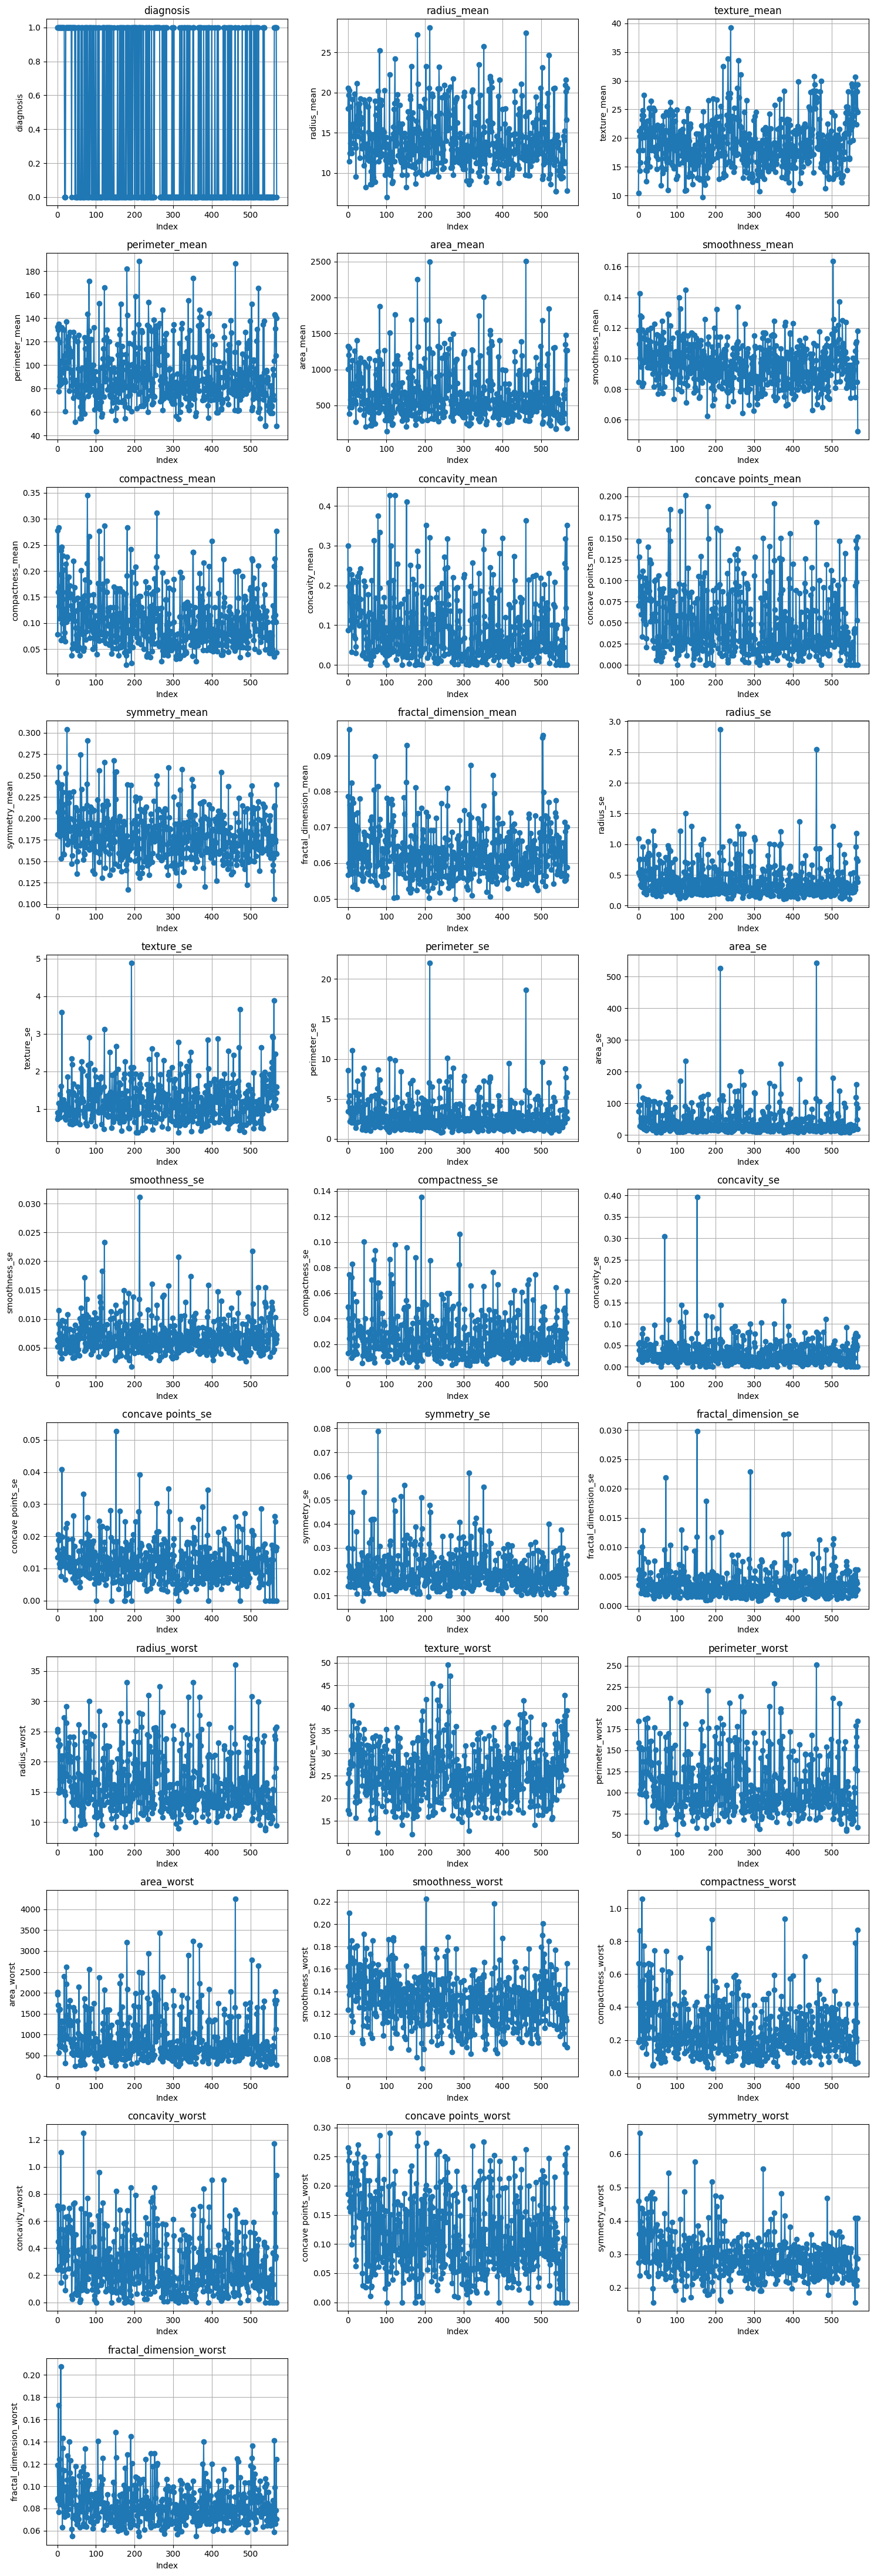

<class 'pandas.core.series.Series'>
==================== AFTER SMOOTHING================================


/tmp/ipykernel_2143/4287241271.py:66: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.158424380970668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i] = x_iNew


Numeric columns to plot: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


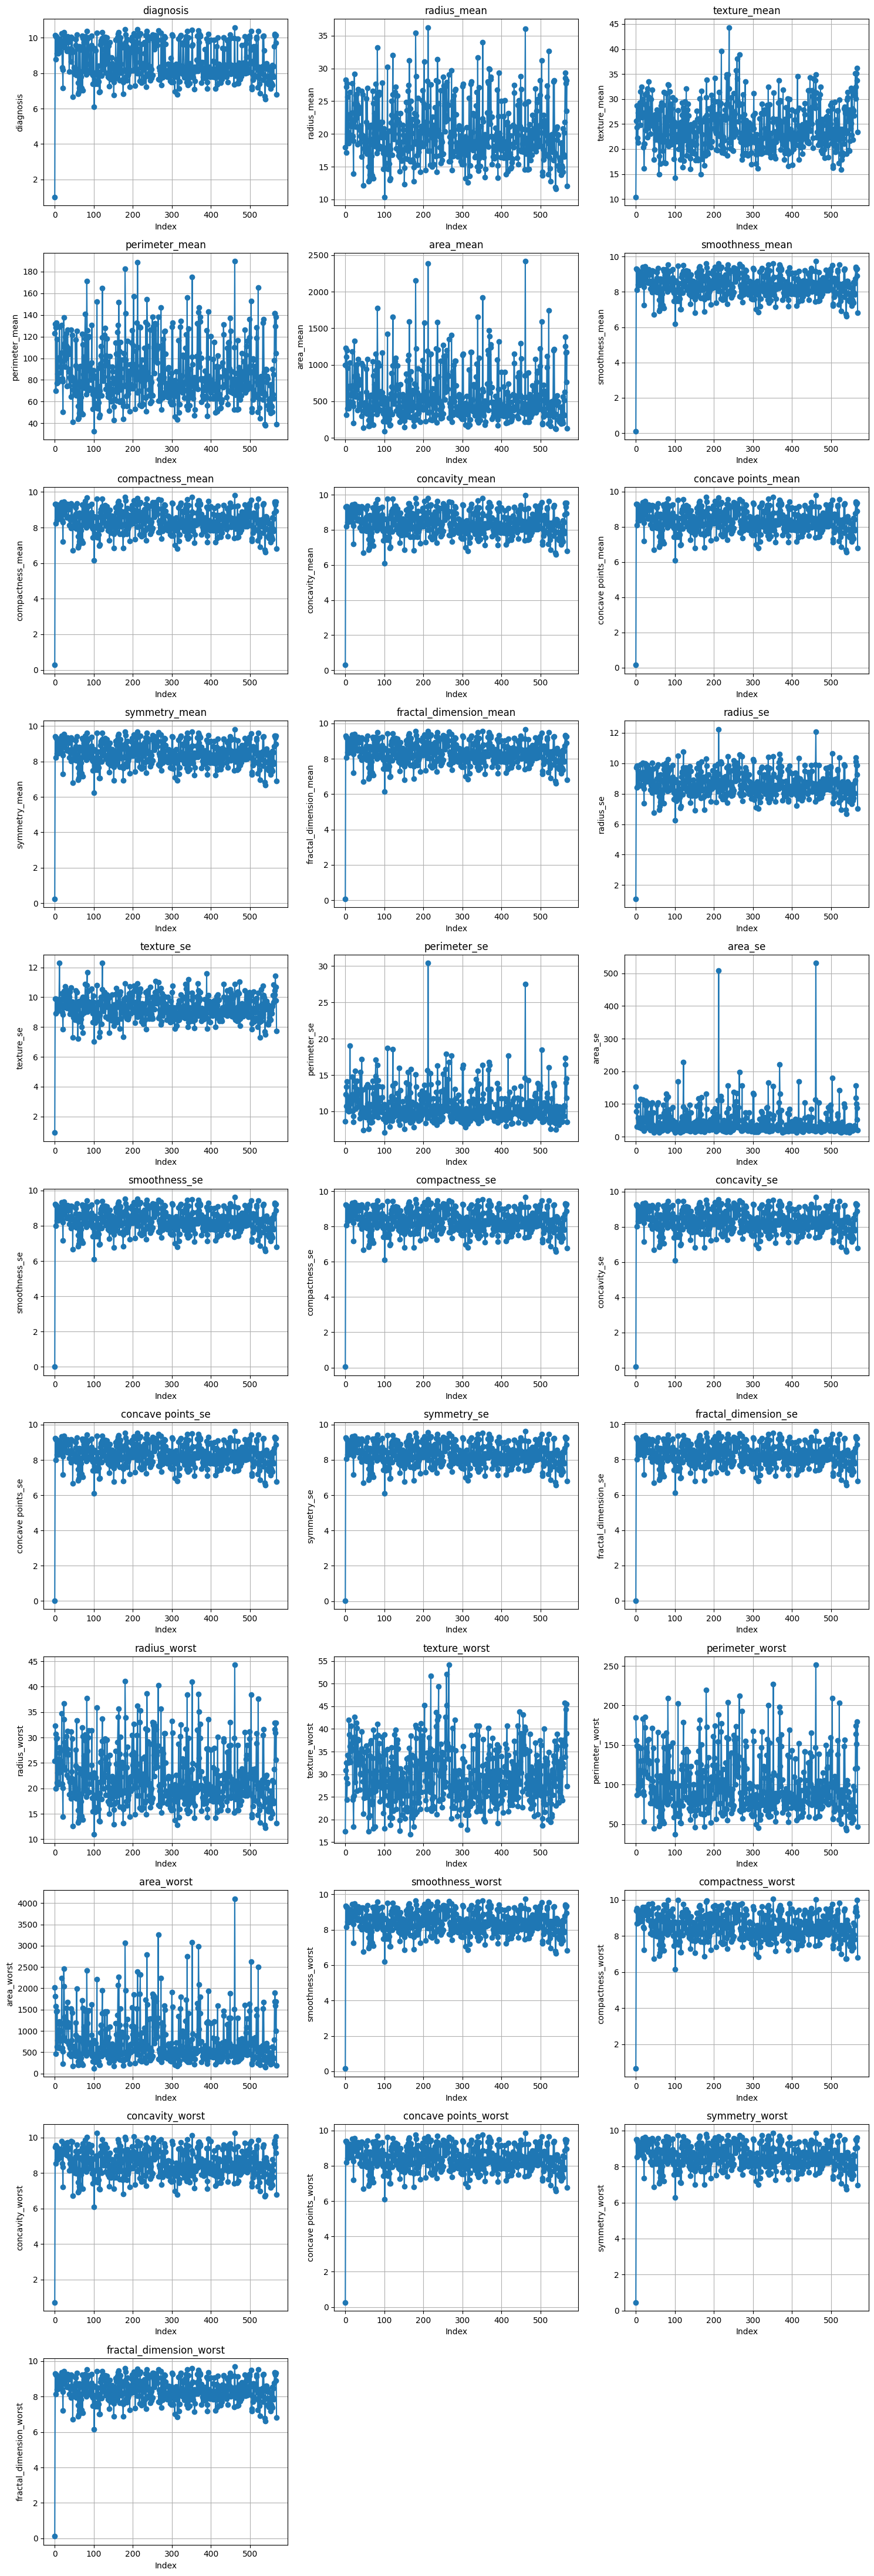

<class 'pandas.core.series.Series'>


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.000000,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,10.158424,28.231185,25.645404,131.967168,1233.786816,9.313188,9.307555,9.315183,9.299733,9.402268,...,32.313024,30.853905,155.885640,1815.587485,9.349260,9.407255,9.458047,9.406701,9.488892,9.317141
2,10.077978,27.201378,28.630619,128.265172,1111.326098,9.262211,9.308295,9.342652,9.278977,9.351356,...,30.756156,32.551868,148.879218,1574.913078,9.294094,9.550716,9.574445,9.384430,9.492814,9.242037
3,8.801421,17.138767,24.307925,70.075314,316.931171,8.115310,8.228449,8.194443,8.085465,8.209085,...,19.931218,29.204715,87.110065,462.234631,8.169159,8.694444,8.550901,8.207325,8.532418,8.139714
4,10.065160,27.715791,22.271455,132.768615,1195.924047,9.241922,9.271660,9.331319,9.245582,9.315672,...,29.774574,24.403439,148.415364,1450.298098,9.275869,9.337724,9.516152,9.298836,9.366455,9.220401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,10.223577,29.332372,30.103787,141.271247,1383.900573,9.397326,9.401880,9.520846,9.423257,9.454578,...,32.947801,33.830746,163.670175,1893.220595,9.425209,9.490547,9.675872,9.500120,9.485621,9.360289
565,10.104726,27.677763,35.136888,129.707937,1167.555153,9.275955,9.281099,9.318395,9.276056,9.347055,...,30.948020,44.323002,151.570889,1599.302534,9.293225,9.362672,9.481448,9.335664,9.422381,9.247083
566,9.728211,23.524583,33.677298,104.622490,767.732741,8.918603,8.934301,8.925643,8.890718,8.984445,...,25.629415,39.018971,120.895134,1002.890137,8.944560,9.117456,9.144784,8.969234,9.039984,8.912987
567,10.133477,28.189489,36.231785,138.275894,1174.562060,9.320772,9.467431,9.535970,9.352278,9.433069,...,32.924587,45.526947,179.270413,1686.763241,9.364254,10.011967,10.077005,9.456376,9.588756,9.326483


In [ ]:
# ADDITIVE SMOOTHING
#26/02/2025
import math

def plot_all_features(df):
  # Select only numeric columns (ignoring non-numeric ones like 'diagnosis')
  numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
  print("Numeric columns to plot:", numeric_cols)
  
  # Determine subplot grid size: 3 columns per row
  num_plots = len(numeric_cols)
  ncols = 3
  nrows = math.ceil(num_plots / ncols)
  
  fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), squeeze=False)
  axes = axes.flatten()
  
  # Create a line plot for each numeric feature
  for i, col in enumerate(numeric_cols):
    axes[i].plot(df.index, df[col], marker='o', linestyle='-')
    axes[i].set_title(col)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
    axes[i].grid(True)
  
  # Remove any empty subplots if grid has extra axes
  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
  
  plt.tight_layout()
  plt.show()
  print(type(df.iloc[0]))
  return df


def additiveSmoothing(x_i: pd.Series, alpha: float) -> pd.Series:
  """
  x_i    - row/instance in a dataset (as a Pandas Series)
  alpha - the pseudocount > 0 (and alpha = 0 indicates no smoothing)
  N     - number of trials (sum of all counts in x)
  d     - d-dimensional distribution (number of features/entries in x)

  The smoothed value x_jNew is computed as:
    x_jNew = N * ((x_j + alpha) / (N + alpha * d))
  """
  diagnosis = x_i[0]
  del x_i[0]
  d = len(x_i)      # number of features
  N = x_i.sum()     # total count

  # Vectorized computation for the new Series:
  # theta' = (x_i+alpha) / (N + alpha * d)
  x_new = N * (x_i + alpha) / (N + alpha * d)
  x_new = x_new.insert(0)
  return x_new

# Load the CSV file
df = pd.read_csv("data.csv")
df = dataClean(df)
df = predClassMapping(df)

plot_all_features(df)
print("==================== AFTER SMOOTHING================================")
for i in range(len(df)):
    x_i = df.iloc[i].to_numpy()
    x_iNew = additiveSmoothing(x_i, 10)
    df.iloc[i] = x_iNew

plot_all_features(df)


In [127]:
# 01/02/2025
# This is the data preprocessing handler. Can be used to execute any one or multiple forms of data preprocessing (cleaning, mapping, feature selection, data splitting).
# NOTE: If data set splitting and CFS are to be done in the same call, the CFS option MUST be first in the `processes` array (so that the dataset is feature selected, and THEN split)
def dataPreProcessing(dsFile = "data", df = None, processes = ["clean", "predMap", "CFS", "splitSet"], kFeatures = 10, tauRedundancy = 0.8, testSize = 0.20):
  returnVars = {"df": None, "CFS Corr Matrix": None, "Xtrain": None, "Xtest": None, "Ytrain": None, "Ytest": None}
  if df is None:
    df = pd.read_csv(dsFile + '.csv')

  for process in processes:
    match process:
      case "clean":
        df = dataClean(df)
      case "predMap":
        df = predClassMapping(df)
      case "CFS":
        res = corrFeatureSelection(df, kFeatures, tauRedundancy)
        returnVars["CFS Corr Matrix"] = res["sfCorrMatrix"]
        df = res["selectedDF"]
      case "splitSet":
        Xtrain, Xtest, Ytrain, Ytest = splitData(df, testSize)
        returnVars["Xtrain"] = Xtrain
        returnVars["Xtest"] = Xtest
        returnVars["Ytrain"] = Ytrain
        returnVars["Ytest"] = Ytest
      case _:
        raise Exception("Processes param is empty. Options: ['clean', 'predMap', 'CFS', 'splitSet']")

  returnVars["df"] = df
  return returnVars